In [1]:
import os
import pandas as pd

In [2]:
data_path = '../../../Data/al_test_experiments/Evolvepro'

In [ ]:
file_path = os.path.join(data_path, 'Source.xlsx')
sheet_name = 'MAPK1'

dataframe = pd.read_excel(file_path, sheet_name=sheet_name) if isinstance(sheet_name, str) else pd.read_excel(file_path)

In [ ]:
temp = [var[:-1] for var in dataframe['variant']]
wts = []
for i in temp:
    if i not in wts:
        wts.append(i)

assert len(wts) == len(set(wts))

wt = ''.join([var[0] for var in wts])
nos = [int(var[1:]) for var in wts]

In [ ]:
for i, n in enumerate(nos):
    assert i+1 == n

In [ ]:
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

## taken from https://github.com/mat10d/EvolvePro
def generate_wt(wt_sequence, output_file):
    """
    Generate a FASTA file containing the wild-type protein sequence.

    Args:
        wt_sequence (str): Wild-type protein sequence.
        output_file (str): Path to the output FASTA file.
    """
    # Create a SeqRecord object of the wild-type sequence
    record = SeqRecord(Seq(wt_sequence), id="brenan_WT", description="brenan_WT")

    # Write the SeqRecord object to a FASTA file
    with open(output_file, "w") as handle:
        SeqIO.write(record, handle, "fasta")

In [ ]:
# generate_wt(wt, os.path.join(data_path, 'brenan_WT.fasta'))

In [3]:
import sys
sys.path.append('../..')

In [4]:
from DomainPrediction.utils import helper

In [5]:
file_path = os.path.join(data_path, 'evolvepro.xlsx')
sheet_name = 'brenan_labels'

dataframe = pd.read_excel(file_path, sheet_name=sheet_name) if isinstance(sheet_name, str) else pd.read_excel(file_path)

In [6]:
dataframe

,variant,PROVEAN,PPH2_HumVar,PPH2_HumDiv,Grantham,BLOSUM62,PhD_SNP,PANTHER,SNPs&GO,FATHMM,...,GenoCanyon,fitCons,phyloP,phastCons,DMS_DOX,DMS_SCH,DMS_VRT,fitness,fitness_scaled,fitness_binary
0,A2C,-0.974,0.368,0.867,195,0,0.337,0.040,0.342,-1.04,...,NaN,NaN,NaN,NaN,-0.574707,-4.176315,-1.136378,-4.176315,0.265834,0
1,A2D,-0.834,0.223,0.634,126,-2,0.440,0.015,0.484,-1.00,...,NaN,NaN,NaN,NaN,-0.326335,-1.918793,-0.601363,-1.918793,0.397712,0
2,A2E,-0.513,0.237,0.769,107,-1,0.251,0.013,0.423,-0.98,...,1.000000,0.266657,5.193,1.0,-0.520984,-3.165665,-2.865412,-3.165665,0.324874,0
3,A2F,-0.954,0.186,0.461,113,-2,0.379,0.034,0.438,-1.02,...,NaN,NaN,NaN,NaN,-0.976330,-6.126452,-3.280308,-6.126452,0.151913,0
4,A2G,-0.382,0.127,0.487,60,0,0.083,0.020,0.084,-0.98,...,1.000000,0.266657,5.193,1.0,-0.304502,-4.255602,-1.899621,-4.255602,0.261203,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6805,S360R,-0.943,0.037,0.145,110,-1,0.162,NaN,0.249,-0.93,...,NaN,NaN,NaN,NaN,-0.881615,-6.197970,-2.470846,-6.197970,0.147735,0
6806,S360T,-0.330,0.001,0.000,58,1,0.026,NaN,0.041,-0.92,...,0.999318,0.706548,3.733,1.0,-0.410311,-1.923711,1.200173,-1.923711,0.397425,0
6807,S360V,-1.212,0.010,0.009,124,-2,0.108,NaN,0.168,-0.89,...,NaN,NaN,NaN,NaN,-0.801050,-4.067132,-0.654516,-4.067132,0.272213,0
6808,S360W,-2.315,0.260,0.661,177,-3,0.227,NaN,0.312,-0.99,...,NaN,NaN,NaN,NaN,-0.716618,-8.461473,-3.759840,-8.461473,0.015508,0


In [7]:
file_path = os.path.join(data_path, 'brenan_WT.fasta')
wt_str = helper.read_fasta(file=file_path, mode='str')[0]

In [8]:
temp = []
for i, row in dataframe[['variant', 'fitness', 'fitness_scaled']].iterrows():
    mut = row['variant']
    fitness = row['fitness']
    fitness_scaled = row['fitness_scaled']
    wt_aa = mut[0]
    mt_aa = mut[-1]
    pos_aa = int(mut[1:-1])

    wt_list = list(wt_str)
    assert wt_list[pos_aa-1] == wt_aa

    wt_list[pos_aa-1] = mt_aa

    seq = ''.join(wt_list)

    temp.append([pos_aa, mut, seq, fitness, fitness_scaled])

In [9]:
len(temp)

6810

In [10]:
## Save files csv
df = pd.DataFrame(temp, columns=['pos', 'mutant', 'seq', 'function', 'function_scaled'])

In [11]:
df.head()

,pos,mutant,seq,function,function_scaled
0,2,A2C,MCAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,-4.176315,0.265834
1,2,A2D,MDAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,-1.918793,0.397712
2,2,A2E,MEAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,-3.165665,0.324874
3,2,A2F,MFAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,-6.126452,0.151913
4,2,A2G,MGAAAAAGAGPEMVRGQVFDVGPRYTNLSYIGEGAYGMVCSAYDNV...,-4.255602,0.261203


In [13]:
# df.to_csv(os.path.join(data_path, 'brenan.csv'), index=False)

<Axes: >

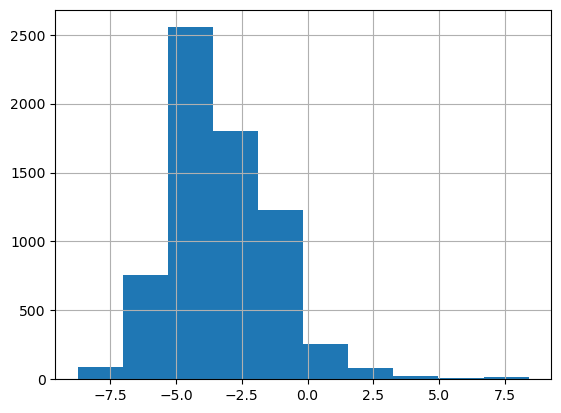

In [12]:
df['function'].hist()

<Axes: >

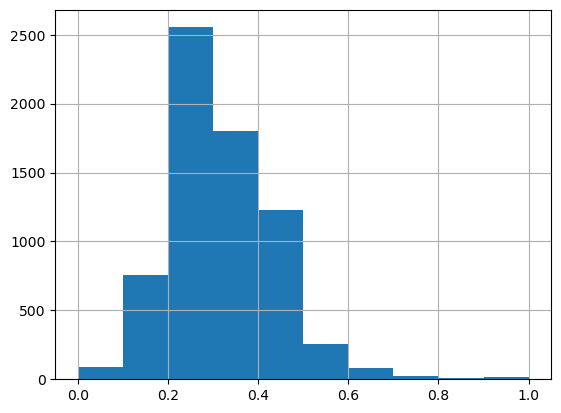

In [21]:
df['function_scaled'].hist()